# Example Linear Regression

In this example (generalized) linear regression, as introduced [in the previous section](LinReg) is implemented and applied for estimating a function $f()$ that maps the speed of long distance runners to their heartrate. 

$$
heartrate = f(speed)
$$

For training the model, a set of 30 samples is applied, each containing the speed (in m/s) of a runner and the heartrate measured at this speed.  

> Note that in this example input data consists of the single feature *speed*, i.e. it is 1-dimensional (d=1). All functions implemented below are tailored to this one-dimensional case.

Required Modules:

In [1]:
#%matplotlib inline
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

Read data from file. The first column contains an ID, the second column is the speed in m/s and the third column is the heartrate in beats/s.

In [2]:
dataframe=pd.read_csv("HeartRate.csv",header=None,sep=";",decimal=",",index_col=0,names=["speed","heartrate"])
dataframe

,speed,heartrate
1,4.50,155.15
2,5.00,166.68
3,4.50,164.37
4,5.25,160.82
5,4.50,148.51
6,4.75,169.83
7,5.00,188.01
8,5.50,187.90
9,4.50,157.96
10,5.25,178.29


In [3]:
numdata=dataframe.shape[0]
print("Number of samples:  ",numdata)

Number of samples:   30


In the function `calculateWeights(X,r,deg)` the weights are calculated by applying the already introduced equation

$$
w=\left( D^T D\right)^{-1} D^T r
$$

The function is tailored to the case, where input data consists of only a single feature. However, the function is implemented such that, it can not only be applied to learn a linear function, but a polynomial of arbitrary degree. The degree of the polynomial can be set by the `deg`-argument of the function.

In [4]:
def calculateWeights(X,r,deg):
    numdata=X.shape[0]
    D=np.zeros((numdata,deg+1))
    for p in range(numdata):
        for ex in range(deg+1):
            D[p][ex]=math.pow(float(X[p]),ex)
    DT=np.transpose(D)
    DTD=np.dot(DT,D)
    y=np.dot(DT,r)
    w=np.linalg.lstsq(DTD,y,rcond=None)[0]
    return w

In [5]:
features=dataframe["speed"].values
targets=dataframe["heartrate"].values

## Learn linear function
First, we learn the best linear function 

$$
heartrate = w_0+w_1 \cdot speed
$$

by setting the `deg`-argument of the function `calculateWeights()` to 1:

In [6]:
degree=1
w=calculateWeights(features,targets,degree)
print('Calculated weights:')
for i in range(len(w)):
    print("w%d = %3.2f"%(i,w[i]))

Calculated weights:
w0 = 67.68
w1 = 20.93


The learned model and the training samples are plotted below:

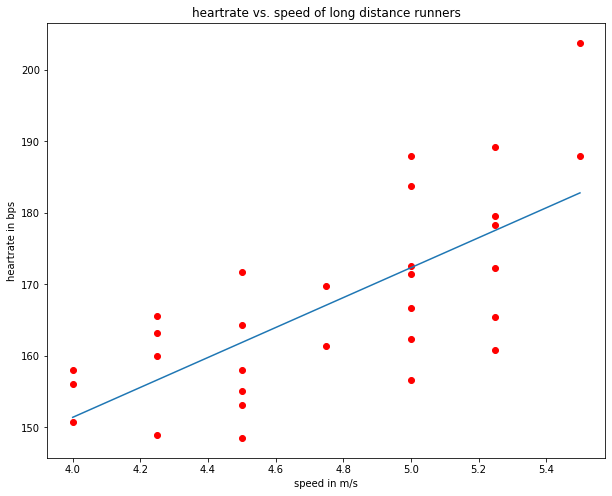

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(features,targets,marker='o', color='red')
plt.title('heartrate vs. speed of long distance runners')
plt.xlabel('speed in m/s')
plt.ylabel('heartrate in bps')
RES=0.05 # resolution of speed-axis
# plot calculated linear regression 
minS=np.min(features)
maxS=np.max(features)
speedrange=np.arange(minS,maxS+RES,RES)
hrrange=np.zeros(speedrange.shape[0])
for si,s in enumerate(speedrange):
    hrrange[si]=np.sum([w[d]*s**d for d in range(degree+1)])
plt.plot(speedrange,hrrange)
plt.show()

Finally the mean absolute distance (MAD) and the Mean Square Error (MSE) are calculated.

In [8]:
pred=np.zeros(numdata)
for si,x in enumerate(features):
    pred[si]=np.sum([w[d]*x**d for d in range(degree+1)])
    
mad=1.0/numdata*np.sum(np.abs(pred-targets))
mse=1.0/numdata*np.sum((pred-targets)**2)
print(mad)  
print('MAD = ',mad)   
print('MSE = ',mse)

7.544456857402341
MAD =  7.544456857402341
MSE =  84.6165034423252


Note that here the metrics MAD and MSE have been calculated on the training data. Hence, the corresponding values describe how well the model is fitted to training data. But these values are useless for determining how good the model will perform on new data. Usually in Machine Learning performance metrics such as MAD and MSE are calculated on test-data. But in this example we haven't split the set of labeled data into a training- and a test-partition.

## Learn quadratic function

In order to learn the best quadratic function

$$
heartrate = w_0+w_1 \cdot speed +w_2 \cdot (speed)^2
$$

we repeat the steps for `deg=2`:

In [9]:
degree=2
w=calculateWeights(features,targets,degree)
print('Calculated weights:')
for i in range(len(w)):
    print("w%d = %3.2f"%(i,w[i]))

Calculated weights:
w0 = 445.13
w1 = -140.19
w2 = 17.04


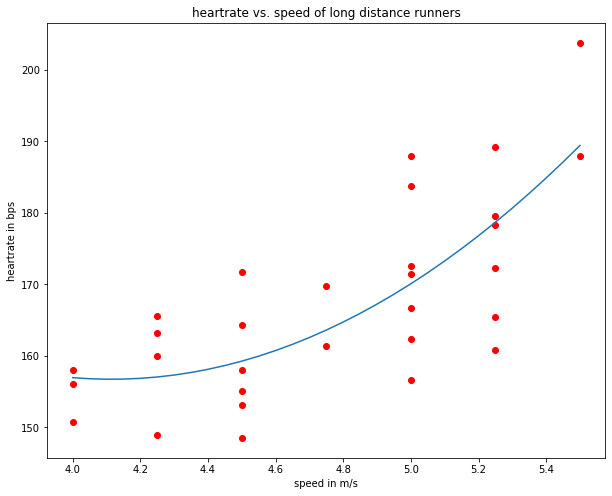

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(features,targets,marker='o', color='red')
plt.title('heartrate vs. speed of long distance runners')
plt.xlabel('speed in m/s')
plt.ylabel('heartrate in bps')
RES=0.05 # resolution of speed-axis
# plot calculated linear regression 
minS=np.min(features)
maxS=np.max(features)
speedrange=np.arange(minS,maxS+RES,RES)
hrrange=np.zeros(speedrange.shape[0])
for si,s in enumerate(speedrange):
    hrrange[si]=np.sum([w[d]*s**d for d in range(degree+1)])
plt.plot(speedrange,hrrange)
plt.show()

In [11]:
pred=np.zeros(numdata)
for si,x in enumerate(features):
    pred[si]=np.sum([w[d]*x**d for d in range(degree+1)])
    
mad=1.0/numdata*np.sum(np.abs(pred-targets))
mse=1.0/numdata*np.sum((pred-targets)**2)
print(mad)  
print('MAD = ',mad)   
print('MSE = ',mse)

6.914621088475273
MAD =  6.914621088475273
MSE =  74.97805153085774


## Learn cubic function

In order to learn the best cubic function

$$
heartrate = w_0+w_1 \cdot speed +w_2 \cdot (speed)^2 +w_3 \cdot (speed)^3
$$

we repeat the steps for `deg=3`:

In [12]:
degree=3
w=calculateWeights(features,targets,degree)
print('Calculated weights:')
for i in range(len(w)):
    print("w%d = %3.2f"%(i,w[i]))

Calculated weights:
w0 = -1374.83
w1 = 1025.96
w2 = -230.63
w3 = 17.44


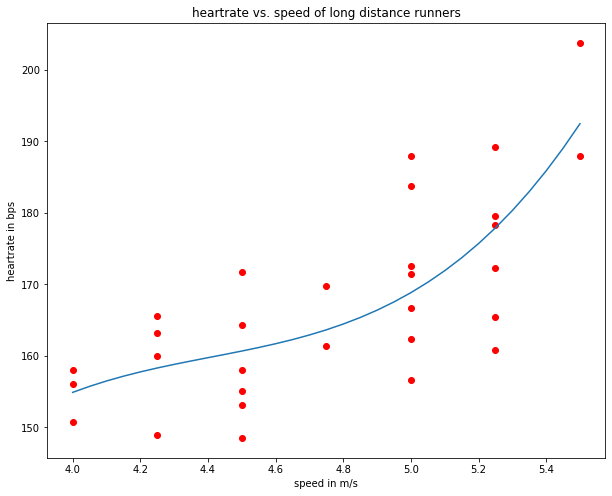

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(features,targets,marker='o', color='red')
plt.title('heartrate vs. speed of long distance runners')
plt.xlabel('speed in m/s')
plt.ylabel('heartrate in bps')
RES=0.05 # resolution of speed-axis
# plot calculated linear regression 
minS=np.min(features)
maxS=np.max(features)
speedrange=np.arange(minS,maxS+RES,RES)
hrrange=np.zeros(speedrange.shape[0])
for si,s in enumerate(speedrange):
    hrrange[si]=np.sum([w[d]*s**d for d in range(degree+1)])
plt.plot(speedrange,hrrange)
plt.show()

In [14]:
pred=np.zeros(numdata)
for si,x in enumerate(features):
    pred[si]=np.sum([w[d]*x**d for d in range(degree+1)])
    
mad=1.0/numdata*np.sum(np.abs(pred-targets))
mse=1.0/numdata*np.sum((pred-targets)**2)
print(mad)  
print('MAD = ',mad)   
print('MSE = ',mse)

6.950713123482488
MAD =  6.950713123482488
MSE =  72.83953065127791


## Same solution, now using Scikit Learn

In [15]:
degree=3

In [16]:
from sklearn import linear_model
speed=np.transpose(np.atleast_2d(dataframe.values[:,0]))
for d in range(1,degree):
    newcol=np.transpose(np.atleast_2d(np.power(speed[:,0],d+1)))
    speed=np.concatenate((speed,newcol),axis=1)
heartrate=dataframe.values[:,1]

# Train Linear Regression Model
reg=linear_model.LinearRegression()
reg.fit(speed,heartrate)
print(reg)

# Parameters of Trained Model 
print("Degree = ",degree)
print("Learned coefficients w0, w1, w2, ....:")
wlist=[reg.intercept_]
wlist.extend(reg.coef_)
w=np.array(wlist)
print(w)

LinearRegression()
Degree =  3
Learned coefficients w0, w1, w2, ....:
[-1374.8269195   1025.96432274  -230.63229039    17.43724445]


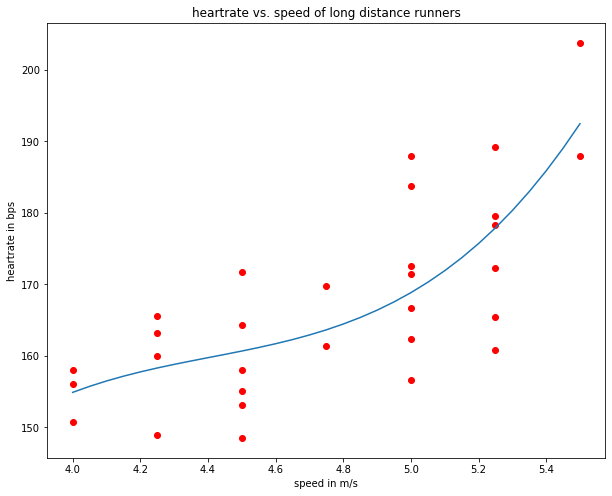

In [17]:
# Plot training samples
plt.figure(figsize=(10,8))
plt.scatter(speed[:,0],heartrate,marker='o', color='red')
plt.title('heartrate vs. speed of long distance runners')
plt.xlabel('speed in m/s')
plt.ylabel('heartrate in bps')
#plt.hold(True)
for si,s in enumerate(speedrange):
    hrrange[si]=np.sum([w[d]*s**d for d in range(degree+1)])
plt.plot(speedrange,hrrange)
plt.show()